# Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Import data

In [3]:


from google.colab import files

uploaded = files.upload()

tweets_file_path = "Tweets.csv"
df = pd.read_csv(tweets_file_path)


Saving Tweets.csv to Tweets.csv


## Cleaning

In [4]:
# Convert the date column to datetime format
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Check for missing values
df.fillna({'negativereason': 'Unknown', 'tweet_location': 'Unknown', 'user_timezone': 'Unknown'}, inplace=True)

# Fill missing values with the mode (most frequent value) of each column
df.fillna(df.mode().iloc[0], inplace=True)

# Drop columns with more than 90% of 0
high_zero_columns = df.columns[(df == 0).mean() > 0.9]
print("Columns mostly filled with zeros:", high_zero_columns)
df.drop(columns=high_zero_columns, inplace=True)
print(df.columns)




Columns mostly filled with zeros: Index(['retweet_count'], dtype='object')
Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold', 'text',
       'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')


<ipython-input-5-2c20fb1db2a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df, palette='viridis')


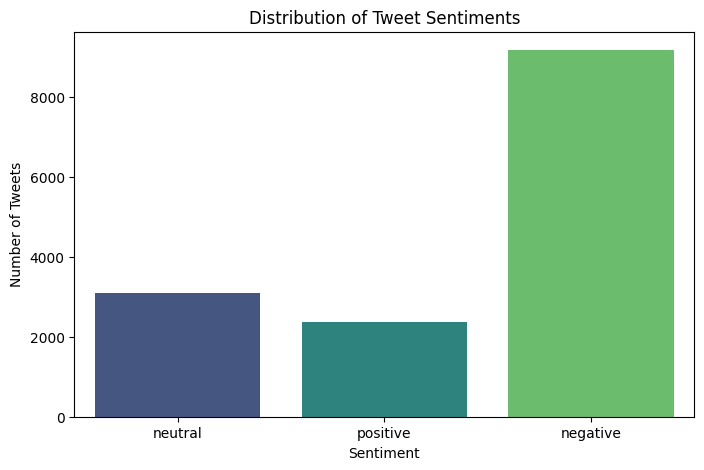

In [5]:
# Visualization of sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(x='airline_sentiment', data=df, palette='viridis')
plt.title('Distribution of Tweet Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


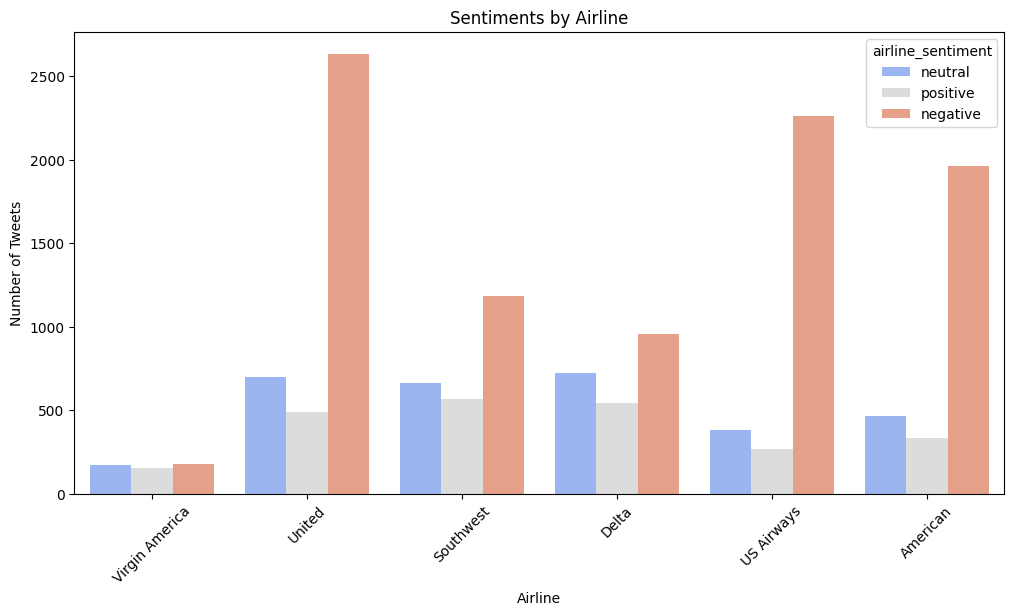

In [6]:
# Sentiment distribution by airline
plt.figure(figsize=(12,6))
sns.countplot(x='airline', hue='airline_sentiment', data=df, palette='coolwarm')
plt.title('Sentiments by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

In [7]:
# Generate a word cloud for negative tweets
negative_tweets = df[df['airline_sentiment'] == 'negative']['text'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)

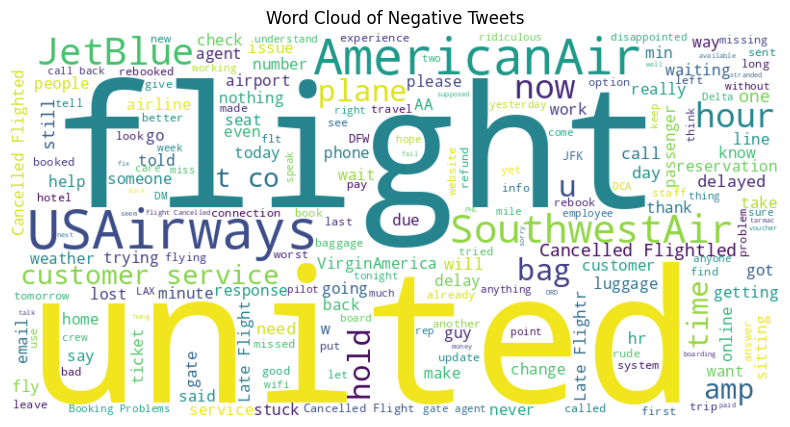

In [8]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Tweets')
plt.show()

In [9]:
# Display the first few rows of the processed dataset
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,Unknown,1.0000,Virgin America,negative,cairdin,Customer Service Issue,@VirginAmerica What @dhepburn said.,"[0.0, 0.0]",2015-02-24 11:35:52-08:00,Unknown,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,Unknown,0.0000,Virgin America,negative,jnardino,Customer Service Issue,@VirginAmerica plus you've added commercials t...,"[0.0, 0.0]",2015-02-24 11:15:59-08:00,Unknown,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,Unknown,1.0000,Virgin America,negative,yvonnalynn,Customer Service Issue,@VirginAmerica I didn't today... Must mean I n...,"[0.0, 0.0]",2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,negative,jnardino,Customer Service Issue,@VirginAmerica it's really aggressive to blast...,"[0.0, 0.0]",2015-02-24 11:15:36-08:00,Unknown,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,negative,jnardino,Customer Service Issue,@VirginAmerica and it's a really big bad thing...,"[0.0, 0.0]",2015-02-24 11:14:45-08:00,Unknown,Pacific Time (US & Canada)


In [11]:
df.to_csv("cleaneddatasettweets.csv", index=False)